In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# **EDA**

In [5]:
#rename

df = df.rename(columns = {"Unnamed: 0":"State"})
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [7]:
#using minmax scaler function
#transformation of single column needs "values.reshape(-1,1)"
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

df[[ 'Murder', 'Assault', 'UrbanPop', 'Rape']]=ms.fit_transform(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])

# **Hierarchical cluster**

In [8]:
df_norm = df.iloc[:,1:]

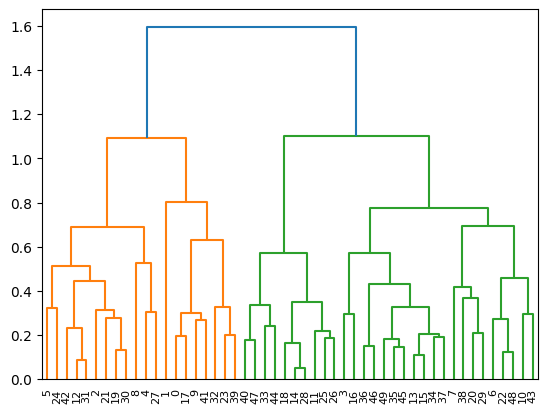

In [9]:
# create dendrogram
import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(df_norm, method='complete'))
plt.show()

In [10]:
# create clusters
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [11]:
hc.fit(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [12]:
yhc = hc.fit_predict(df_norm)
yhc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0])

In [13]:
df["clusters"] = yhc

In [14]:
df

,State,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,0.746988,0.654110,0.440678,0.359173,3
1,Alaska,0.554217,0.746575,0.271186,0.961240,4
2,Arizona,0.439759,0.852740,0.813559,0.612403,1
3,Arkansas,0.481928,0.496575,0.305085,0.315245,0
4,California,0.493976,0.791096,1.000000,0.860465,1
5,Colorado,0.427711,0.544521,0.779661,0.811370,1
6,Connecticut,0.150602,0.222603,0.762712,0.098191,0
7,Delaware,0.307229,0.660959,0.677966,0.219638,0
8,Florida,0.879518,0.993151,0.813559,0.635659,1
9,Georgia,1.000000,0.568493,0.474576,0.478036,3


In [15]:
df.groupby('clusters').agg(['mean']).reset_index()

<ipython-input-15-a7a0e2958129>:1: FutureWarning: ['State'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('clusters').agg(['mean']).reset_index()


,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,0.296084,0.298973,0.657627,0.279070
1,1,0.607430,0.725742,0.785311,0.644703
2,2,0.143373,0.115411,0.293220,0.111886
3,3,0.835628,0.706458,0.377724,0.371724
4,4,0.554217,0.746575,0.271186,0.961240


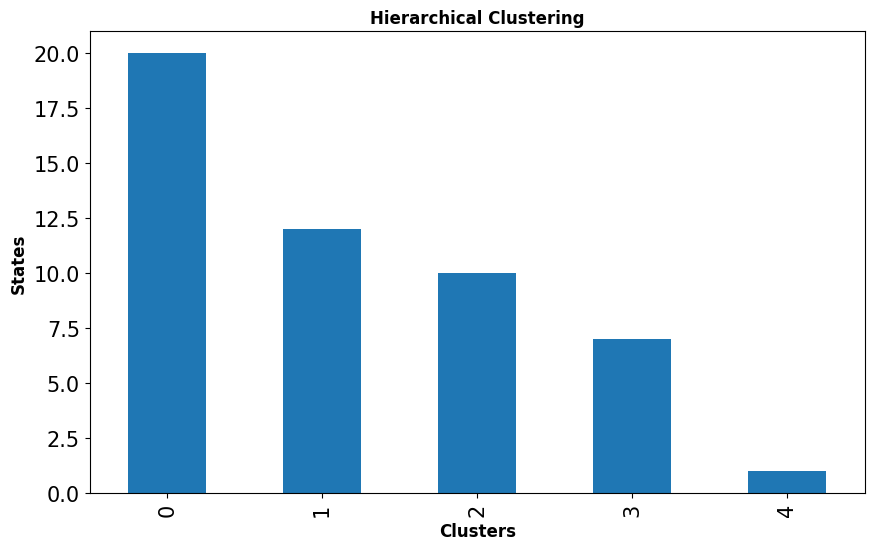

In [16]:
# Plotting barplot using groupby method to get visualization of how states in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['clusters']).count()['State'].plot(kind='bar')
plt.ylabel('States')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# **K-Means cluster**

In [33]:
df = pd.read_csv("crime_data.csv")
df_org = df.copy()

In [18]:
#rename

df = df.rename(columns = {"Unnamed: 0":"State"})
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [19]:
df.columns

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [20]:
#scale the features using standardScaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df[['Murder', 'Assault', 'UrbanPop', 'Rape']] = sc.fit_transform(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])

In [21]:
#find the optimum number of clusters

from sklearn.cluster import KMeans

In [22]:
#inertia calculates the within cluster sum of squares

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df.iloc[:,1:])
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [23]:
wcss

[200.00000000000003,
 104.96163315756871,
 80.08569526137276,
 57.66757825000804,
 50.16335813593605,
 45.484576119528015,
 41.153926856054056,
 36.57674761411242,
 32.48602700660288,
 29.462178916006575]

<Axes: >

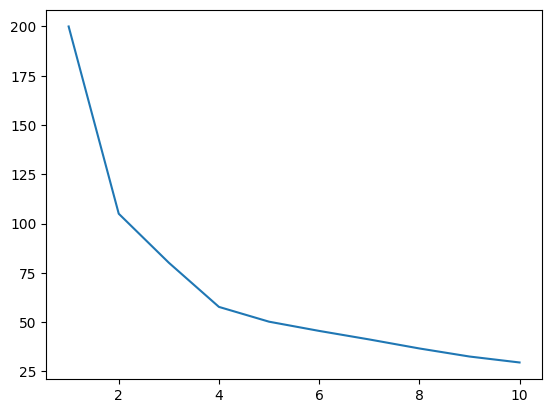

In [24]:
sns.lineplot(x=range(1,11),y=wcss)

In [25]:
# Consider cluster = 4
kmeans = KMeans(n_clusters=4)
predict=kmeans.fit_predict(df.iloc[:,1:])
predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 0, 0, 3, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 1, 3, 1, 0, 2, 0,
       1, 3, 0, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       1, 2, 2, 1, 1, 2], dtype=int32)

In [26]:
df["clusterid"] =kmeans.labels_
df

,State,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,1.255179,0.790787,-0.526195,-0.003451,3
1,Alaska,0.513019,1.118060,-1.224067,2.509424,0
2,Arizona,0.072361,1.493817,1.009122,1.053466,0
3,Arkansas,0.234708,0.233212,-1.084492,-0.186794,3
4,California,0.281093,1.275635,1.776781,2.088814,0
5,Colorado,0.025976,0.402909,0.869548,1.883901,0
6,Connecticut,-1.040880,-0.736484,0.799761,-1.092723,2
7,Delaware,-0.437875,0.815030,0.450825,-0.585834,2
8,Florida,1.765415,1.990786,1.009122,1.150530,0
9,Georgia,2.229265,0.487757,-0.386621,0.492653,3


In [27]:
kmeans.cluster_centers_

array([[ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [28]:
df1 = df.groupby("clusterid").mean().reset_index()
df1

<ipython-input-28-276f753fb9b1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df.groupby("clusterid").mean().reset_index()


,clusterid,Murder,Assault,UrbanPop,Rape
0,0,0.702127,1.049994,0.729974,1.289904
1,1,-0.971303,-1.117836,-0.939550,-0.976578
2,2,-0.494407,-0.386484,0.581676,-0.264310
3,3,1.426224,0.883211,-0.822791,0.019467


In [29]:
df["State"][df["clusterid"]==0]

1         Alaska
2        Arizona
4     California
5       Colorado
8        Florida
12      Illinois
19      Maryland
21      Michigan
24      Missouri
27        Nevada
30    New Mexico
31      New York
42         Texas
Name: State, dtype: object

In [30]:
label_0 = df[predict==0]
label_1 = df[predict==1]
label_2 = df[predict==2]
label_3 = df[predict==3]

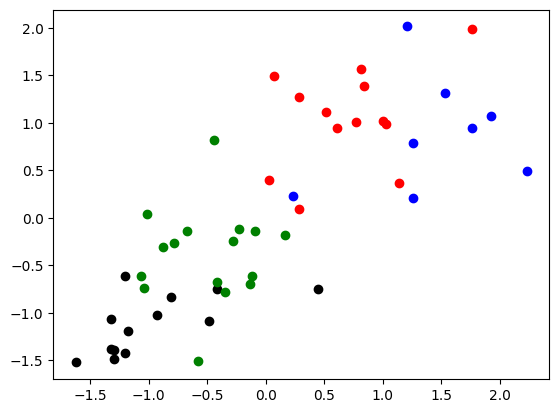

In [31]:
df3 = df.iloc[:,1:5]
cols = df3.columns

plt.scatter(label_0[cols[0]], label_0[cols[1]], color = 'red')
plt.scatter(label_1[cols[0]], label_1[cols[1]], color = 'black')
plt.scatter(label_2[cols[0]], label_2[cols[1]], color = 'green')
plt.scatter(label_3[cols[0]], label_3[cols[1]], color = 'blue')
plt.show()

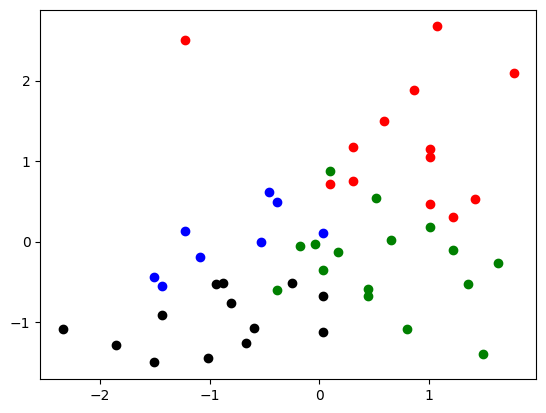

In [32]:
plt.scatter(label_0[cols[2]], label_0[cols[3]], color = 'red')
plt.scatter(label_1[cols[2]], label_1[cols[3]], color = 'black')
plt.scatter(label_2[cols[2]], label_2[cols[3]], color = 'green')
plt.scatter(label_3[cols[2]], label_3[cols[3]], color = 'blue')
plt.show()

# **DBSCAN**

In [43]:
from sklearn.cluster import DBSCAN

In [35]:
df = pd.read_csv("crime_data.csv")
df_org = df.copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [37]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [38]:
stscaler = StandardScaler()
df.iloc[:,:] = stscaler.fit_transform(df.iloc[:,:])

In [39]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=8)#suppose nieghbour = 8

nbrs = nn.fit(df)

distances,indices = nbrs.kneighbors(df)

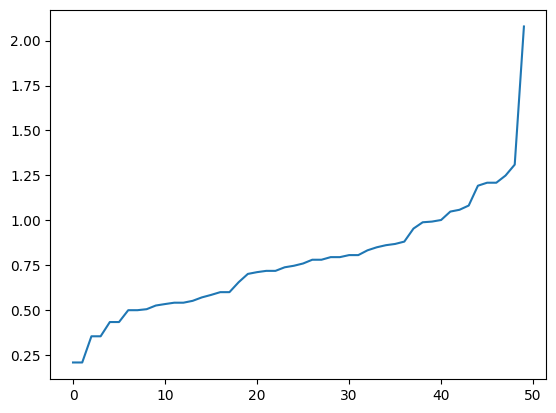

In [40]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)

In [41]:
distances

array([0.2079438 , 0.2079438 , 0.35377437, 0.35377437, 0.43312429,
       0.43312429, 0.49909939, 0.49909939, 0.50466926, 0.52515083,
       0.53326883, 0.54082482, 0.54082482, 0.55122406, 0.57035779,
       0.58411812, 0.59956023, 0.59956023, 0.65497312, 0.70111326,
       0.71097658, 0.71809843, 0.71809843, 0.73797792, 0.74649625,
       0.75913104, 0.78006247, 0.78006247, 0.79455301, 0.79455301,
       0.80586349, 0.80586349, 0.83250223, 0.84928467, 0.8610239 ,
       0.86797806, 0.88100359, 0.95367898, 0.98866758, 0.99246041,
       1.0013278 , 1.0482199 , 1.0582674 , 1.08184506, 1.19227586,
       1.20897691, 1.20897691, 1.24886253, 1.30974334, 2.07898369])

In [86]:
dbscan = DBSCAN(eps=1.40, min_samples=5)
dbscan.fit_predict(df)

array([ 0, -1,  0,  0,  0,  0,  1, -1,  0,  0,  1,  1,  0,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  0,  1, -1,  1,  1,  1,  1,  1])

In [87]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  1, -1,  0,  0,  1,  1,  0,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  0,  1, -1,  1,  1,  1,  1,  1])

In [88]:
df['cluster']=dbscan.labels_
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,1.255179,0.790787,-0.526195,-0.003451,0
1,0.513019,1.118060,-1.224067,2.509424,-1
2,0.072361,1.493817,1.009122,1.053466,0
3,0.234708,0.233212,-1.084492,-0.186794,0
4,0.281093,1.275635,1.776781,2.088814,0


In [89]:
# Use pandas filtering and get noisy datapoints -1
df[df['cluster']==-1]

,Murder,Assault,UrbanPop,Rape,cluster
1,0.513019,1.118060,-1.224067,2.509424,-1
7,-0.437875,0.815030,0.450825,-0.585834,-1
44,-1.295998,-1.487999,-2.340661,-1.081938,-1


In [90]:
from sklearn.metrics import silhouette_score
silhouette_score(df,df["cluster"])

0.3795000988984665